In [110]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Scikit-Learn

# Data Scaling
from sklearn.preprocessing import StandardScaler
# Data Splitting
from sklearn.model_selection import train_test_split
# Model Evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
# Classification-Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [2]:
df = pd.read_csv('heart.csv')

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [4]:
df.shape

(1025, 14)

In [5]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [6]:
df['cp'].unique()

array([0, 1, 2, 3])

In [7]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [8]:
df['age'].describe()

count    1025.000000
mean       54.434146
std         9.072290
min        29.000000
25%        48.000000
50%        56.000000
75%        61.000000
max        77.000000
Name: age, dtype: float64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


<font size="6" color='pink'>HeatMap</font>

In [10]:
corr_matrix = df.corr()
corr_matrix

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.103240,-0.071966,0.271121,0.219823,0.121243,-0.132696,-0.390227,0.088163,0.208137,-0.169105,0.271551,0.072297,-0.229324
sex,-0.103240,1.000000,-0.041119,-0.078974,-0.198258,0.027200,-0.055117,-0.049365,0.139157,0.084687,-0.026666,0.111729,0.198424,-0.279501
cp,-0.071966,-0.041119,1.000000,0.038177,-0.081641,0.079294,0.043581,0.306839,-0.401513,-0.174733,0.131633,-0.176206,-0.163341,0.434854
trestbps,0.271121,-0.078974,0.038177,1.000000,0.127977,0.181767,-0.123794,-0.039264,0.061197,0.187434,-0.120445,0.104554,0.059276,-0.138772
chol,0.219823,-0.198258,-0.081641,0.127977,1.000000,0.026917,-0.147410,-0.021772,0.067382,0.064880,-0.014248,0.074259,0.100244,-0.099966
fbs,0.121243,0.027200,0.079294,0.181767,0.026917,1.000000,-0.104051,-0.008866,0.049261,0.010859,-0.061902,0.137156,-0.042177,-0.041164
restecg,-0.132696,-0.055117,0.043581,-0.123794,-0.147410,-0.104051,1.000000,0.048411,-0.065606,-0.050114,0.086086,-0.078072,-0.020504,0.134468
thalach,-0.390227,-0.049365,0.306839,-0.039264,-0.021772,-0.008866,0.048411,1.000000,-0.380281,-0.349796,0.395308,-0.207888,-0.098068,0.422895
exang,0.088163,0.139157,-0.401513,0.061197,0.067382,0.049261,-0.065606,-0.380281,1.000000,0.310844,-0.267335,0.107849,0.197201,-0.438029
oldpeak,0.208137,0.084687,-0.174733,0.187434,0.064880,0.010859,-0.050114,-0.349796,0.310844,1.000000,-0.575189,0.221816,0.202672,-0.438441


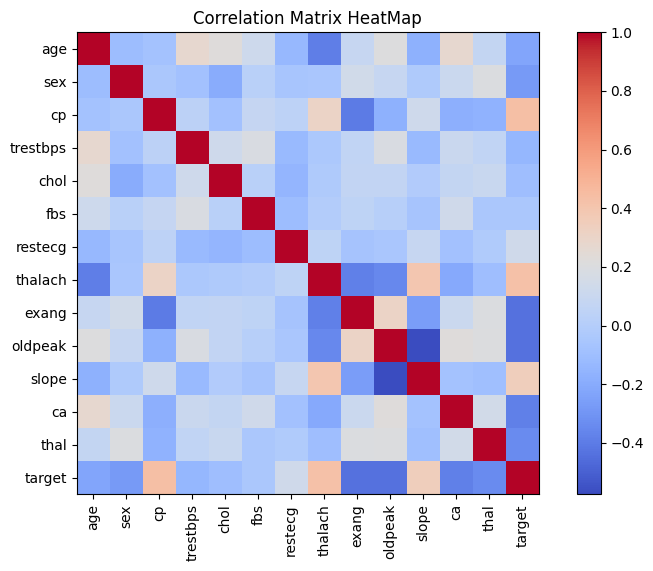

In [11]:
fig, ax = plt.subplots(figsize=(10,6))
cax = ax.imshow(corr_matrix, cmap='coolwarm', interpolation='nearest')
fig.colorbar(cax)
 
plt.xticks(rotation=90)
ax.set_xticks(np.arange(len(corr_matrix.columns)))
ax.set_yticks(np.arange(len(corr_matrix.columns)))
ax.set_xticklabels(corr_matrix.columns)
ax.set_yticklabels(corr_matrix.columns)

plt.title('Correlation Matrix HeatMap')
plt.show()

In [12]:
y = df['target']
df.drop('target', axis=1, inplace=True)
X = df

<font size="6" color='pink'>Data Splitting</font>

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
print('X Train Length: ',len(X_train))
print('X Test Length: ',len(X_test))
print('y Train Length: ',len(y_train))
print('y Test Length: ',len(y_test))

X Train Length:  820
X Test Length:  205
y Train Length:  820
y Test Length:  205


<font size="6" color='pink'>Data Scaling</font>

In [15]:
scaler = StandardScaler()

In [16]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

<font size="6" color='pink'>Model Training</font>

<font size="4" color='yellow'>Logistic Regression</font>

In [57]:
model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)

LogisticRegression()

In [58]:
y_pred_lr = model_lr.predict(X_test)
len(y_pred_lr)

205

<b><font size="2" color='red'>Evaluation</font></b>

In [59]:
accuracy_lr = accuracy_score(y_test, y_pred_lr)*100
print(f"Accuracy is {accuracy_lr}%")

Accuracy is 79.51219512195122%


In [60]:
# Precision
precision_lr = precision_score(y_test, y_pred_lr)*100
print(f"Precision is {precision_lr}%")

Precision is 75.63025210084034%


In [47]:
# Recall
recall_lr = recall_score(y_test, y_pred_lr)*100
print(f"Recall is {recall_lr}%")

Recall is 87.37864077669903%


In [48]:
# F1-Score
f1_score_lr = f1_score(y_test, y_pred_lr)*100
print(f"F1-Score is {f1_score_lr}%")

F1-Score is 81.08108108108108%


In [61]:
# Confusion Matrix
cm_lr = confusion_matrix(y_test, y_pred_lr)
print(cm_lr)
print()

diagram_lr = [['TP','FN'],['FP','TN']]
for row in diagram_lr:
    print(row)

[[73 29]
 [13 90]]

['TP', 'FN']
['FP', 'TN']


<font size="4" color='yellow'>Decision Tree</font>

In [93]:
model_dt = DecisionTreeClassifier()
model_dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [90]:
y_pred_dt = model_dt.predict(X_test)
len(y_pred_dt)

205

<b><font size="2" color='red'>Evaluation</font></b>

In [92]:
# Accuracy
accuracy_dt = accuracy_score(y_test, y_pred_dt)*100
print(f"Accuracy is {accuracy_dt}%")

Accuracy is 98.53658536585365%


In [66]:
# Precision
precision_dt = precision_score(y_test, y_pred_dt)*100
print(f"Precision is {precision_dt}%")

Precision is 100.0%


In [67]:
# Recall
recall_dt = recall_score(y_test, y_pred_dt)*100
print(f"Recall is {recall_dt}%")

Recall is 97.0873786407767%


In [68]:
# F1-Score
f1_score_dt = f1_score(y_test, y_pred_dt)*100
print(f"F1-Score is {f1_score_dt}%")

F1-Score is 98.52216748768473%


In [69]:
# Confusion Matrix
cm_dt = confusion_matrix(y_test, y_pred_dt)
print(cm_dt)
print()

diagram_dt = [['TP','FN'],['FP','TN']]
for row in diagram_dt:
    print(row)

[[102   0]
 [  3 100]]

['TP', 'FN']
['FP', 'TN']


<font size="4" color='yellow'>Random Forest</font>

In [71]:
model_rf = RandomForestClassifier()
model_rf.fit(X_train, y_train)

RandomForestClassifier()

In [72]:
y_pred_rf = model_rf.predict(X_test)
len(y_pred_rf)

205

<b><font size="2" color='red'>Evaluation</font></b>

In [75]:
# Accuracy
accuracy_rf = accuracy_score(y_test, y_pred_rf)*100
print(f"Accuracy is {accuracy_rf}%")

Accuracy is 98.53658536585365%


In [76]:
# Precision
precision_rf = precision_score(y_test, y_pred_rf)*100
print(f"Precision is {precision_rf}%")

Precision is 100.0%


In [77]:
# Recall
recall_rf = recall_score(y_test, y_pred_rf)*100
print(f"Recall is {recall_rf}%")

Recall is 97.0873786407767%


In [78]:
# F1-Score
f1_score_rf = f1_score(y_test, y_pred_rf)*100
print(f"F1-Score is {f1_score_rf}%")

F1-Score is 98.52216748768473%


In [79]:
# Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
print(cm_rf)
print()

diagram_rf = [['TP','FN'],['FP','TN']]
for row in diagram_rf:
    print(row)

[[102   0]
 [  3 100]]

['TP', 'FN']
['FP', 'TN']


<font size="6" color='pink'>Visualization</font>

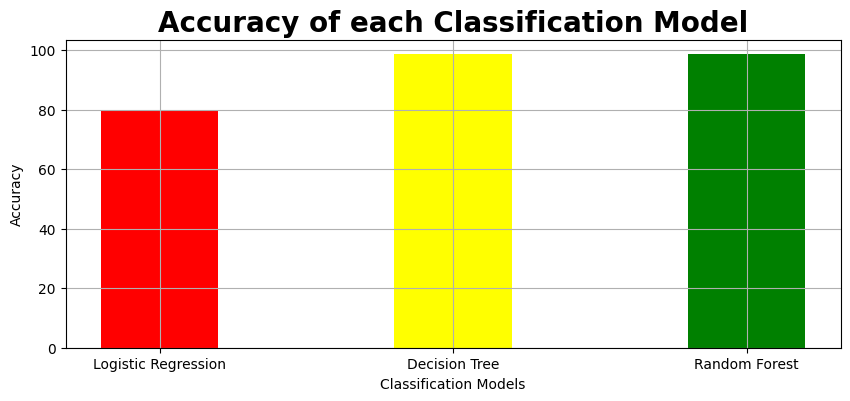

In [103]:
# for accuracy

data = [accuracy_lr, accuracy_dt, accuracy_rf]
models = ['Logistic Regression', 'Decision Tree', 'Random Forest']
colors = ['red', 'yellow', 'green']
plt.figure(figsize=(10,4))
plt.bar(models, data, color=colors, width=0.4)
plt.ylabel("Accuracy")
plt.xlabel("Classification Models")
plt.title("Accuracy of each Classification Model", fontsize=20, fontweight='bold')
plt.grid()
plt.show()

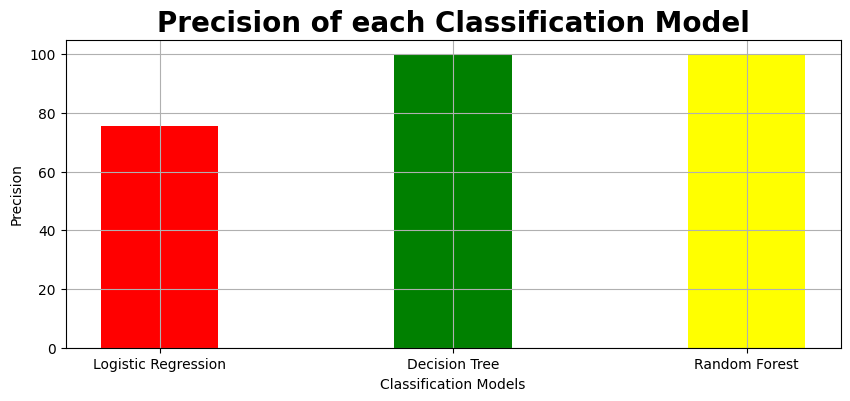

In [108]:
# for precision
data = [precision_lr, precision_dt, precision_rf]
models = ['Logistic Regression', 'Decision Tree', 'Random Forest']
colors = ['red','green','yellow']
plt.figure(figsize=(10,4))
plt.bar(models, data, color=colors, width=0.4)
plt.ylabel("Precision")
plt.xlabel("Classification Models")
plt.title("Precision of each Classification Model", fontsize=20, fontweight='bold')
plt.grid()
plt.show()

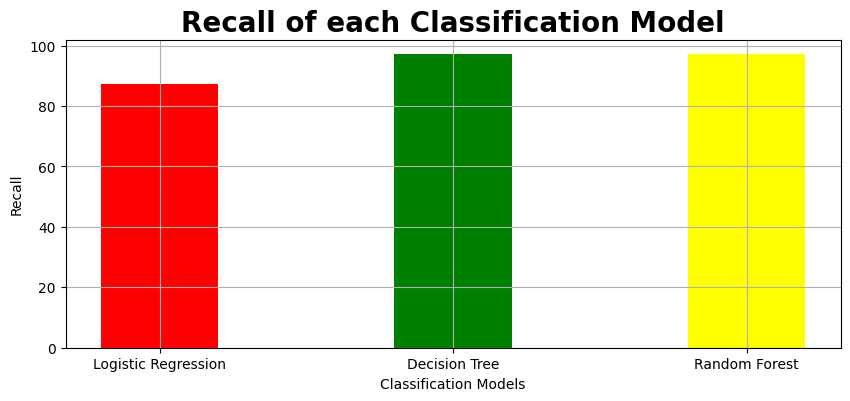

In [107]:
# for recall
data = [recall_lr, recall_dt, recall_rf]
models = ['Logistic Regression', 'Decision Tree', 'Random Forest']
colors = ['red','green','yellow']
plt.figure(figsize=(10,4))
plt.bar(models, data, color=colors, width=0.4)
plt.ylabel("Recall")
plt.xlabel("Classification Models")
plt.title("Recall of each Classification Model", fontsize=20, fontweight='bold')
plt.grid()
plt.show()

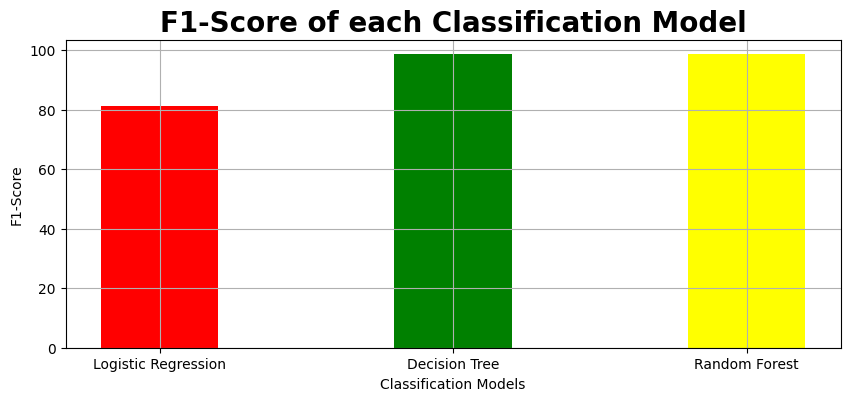

In [109]:
# for f1-score
data = [f1_score_lr, f1_score_dt, f1_score_rf]
models = ['Logistic Regression', 'Decision Tree', 'Random Forest']
colors = ['red','green','yellow']
plt.figure(figsize=(10,4))
plt.bar(models, data, color=colors, width=0.4)
plt.ylabel("F1-Score")
plt.xlabel("Classification Models")
plt.title("F1-Score of each Classification Model", fontsize=20, fontweight='bold')
plt.grid()
plt.show()